# k-Nearest Neighbor Model (Supervised Learning task)

New point on a dataset is classified in a class depending on a classification and distance basis

In [20]:
import random
import math
from collections import Counter
import matplotlib.pyplot as plt

In [21]:
# Generate random training data
def generate_random_data(n_samples=50, n_features=2, n_classes=3):
    """Generate random training data with specified classes"""
    X = []
    y = []
    
    # Create clusters for each class
    for class_label in range(n_classes):
        # Random center for each class cluster
        center_x = random.uniform(-10, 10)
        center_y = random.uniform(-10, 10)
        
        # Generate points around this center
        for _ in range(n_samples // n_classes):
            x = center_x + random.gauss(0, 3)  # Add some noise
            y_coord = center_y + random.gauss(0, 3)
            X.append([x, y_coord])
            y.append(class_label)
    
    return X, y

In [ ]:
# Calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    """Calculate the Euclidean distance between two points"""
    distance = 0  # Initialize distance accumulator
    
    # Loop through each feature/dimension
    for i in range(len(point1)):
        # Calculate squared difference for this dimension
        # (x1 - x2)² for each feature
        distance += (point1[i] - point2[i]) ** 2
    
    # Take square root to get final Euclidean distance
    # Formula: √[(x1-x2)² + (y1-y2)² + ... + (n1-n2)²]
    return math.sqrt(distance)

# KNN Classifier
class SimpleKNN:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None
    
    def fit(self, X, y):
        """Store the training data"""
        self.X_train = X
        self.y_train = y
    
    def predict_single(self, test_point):
        """Predict the class for a single test point"""
        # Calculate distances to all training points
        distances = []
        for i, train_point in enumerate(self.X_train):
            dist = euclidean_distance(test_point, train_point)
            distances.append((dist, self.y_train[i]))
        
        # Sort by distance and get k nearest neighbors
        distances.sort(key=lambda x: x[0])
        k_nearest = distances[:self.k]
        
        # Get the labels of k nearest neighbors
        neighbor_labels = [label for _, label in k_nearest]
        
        # Return the most common label (majority vote)
        most_common = Counter(neighbor_labels).most_common(1)
        return most_common[0][0]
    
    def predict(self, X_test):
        """Predict classes for multiple test points"""
        predictions = []
        for test_point in X_test:
            pred = self.predict_single(test_point)
            predictions.append(pred)
        return predictions
    
    def accuracy(self, X_test, y_test):
        """Calculate accuracy on test data"""
        predictions = self.predict(X_test)
        correct = sum(1 for pred, actual in zip(predictions, y_test) if pred == actual)
        return correct / len(y_test)

In [23]:
# Generate sample data
print("Generating random training data...")
X_train, y_train = generate_random_data(n_samples=60, n_features=2, n_classes=3)

# Generate test data
print("Generating random test data...")
X_test, y_test = generate_random_data(n_samples=30, n_features=2, n_classes=3)

print(f"Training data: {len(X_train)} samples")
print(f"Test data: {len(X_test)} samples")
print(f"Features per sample: {len(X_train[0])}")

Generating random training data...
Generating random test data...
Training data: 60 samples
Test data: 30 samples
Features per sample: 2


In [24]:
# Create and train the KNN model
k = 5
knn = SimpleKNN(k=k)
knn.fit(X_train, y_train)

# Make predictions
print(f"\nTraining KNN with k={k}")
predictions = knn.predict(X_test)


Training KNN with k=5


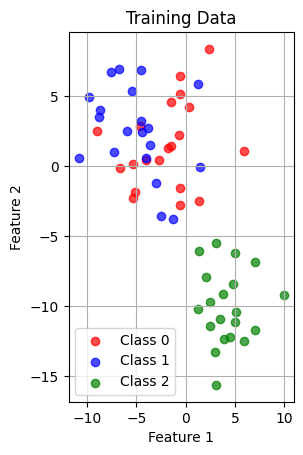

In [25]:
# Plot training data
plt.subplot(1, 2, 1)
colors = ['red', 'blue', 'green', 'orange', 'purple']
for class_label in set(y_train):
    class_points = [X_train[i] for i in range(len(X_train)) if y_train[i] == class_label]
    x_coords = [point[0] for point in class_points]
    y_coords = [point[1] for point in class_points]
    plt.scatter(x_coords, y_coords, c=colors[class_label], label=f'Class {class_label}', alpha=0.7)

plt.title('Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

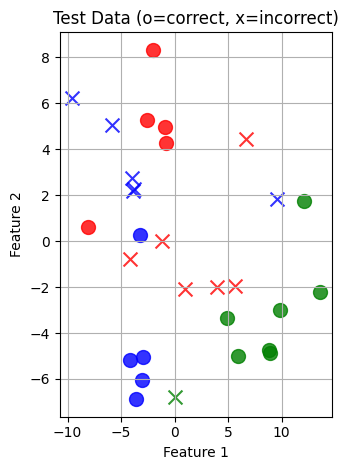

In [26]:
# Plot test data with predictions
plt.subplot(1, 2, 2)
for i, (test_point, pred, actual) in enumerate(zip(X_test, predictions, y_test)):
    color = colors[pred]
    marker = 'o' if pred == actual else 'x'  # X for wrong predictions
    plt.scatter(test_point[0], test_point[1], c=color, marker=marker, s=100, alpha=0.8)

plt.title('Test Data (o=correct, x=incorrect)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)

plt.tight_layout()
plt.show()

In [27]:
# Test with different k values
print("\n" + "="*50)
print("Testing different k values:")
print("="*50)

k_values = [1, 3, 5, 7, 9]
for k in k_values:
    knn_temp = SimpleKNN(k=k)
    knn_temp.fit(X_train, y_train)
    acc = knn_temp.accuracy(X_test, y_test)
    print(f"k={k}: Accuracy = {acc:.3f}")


Testing different k values:
k=1: Accuracy = 0.467
k=3: Accuracy = 0.567
k=5: Accuracy = 0.567
k=7: Accuracy = 0.433
k=9: Accuracy = 0.433
